In [4]:
import pandas as pd

male_df = pd.read_csv('male.csv')
male_df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
new_male = male_df[['stature', 'weightkg', 'chestcircumference', 'waistcircumference', 'crotchheight']]
new_male.insert(4, column = "tshirt_size", value="-")
new_male.insert(4, column = "pants_size", value="-")

In [6]:
new_male.insert(5, column = "tshirt_color", value="-")
new_male.insert(5, column = "pants_color", value="-")

In [7]:
new_male.head()

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight
0,1776,815,1074,933,-,-,-,-,877
1,1702,726,1021,870,-,-,-,-,851
2,1735,929,1120,964,-,-,-,-,854
3,1655,794,1114,857,-,-,-,-,769
4,1914,946,1048,868,-,-,-,-,1014


In [8]:
tshirt_size = []
tshirt_color = []

for chest, waist in zip(new_male['chestcircumference'], new_male['waistcircumference']):
    if chest < 965:
        if waist >= 860:
            tshirt_size.append('Medium')
            tshirt_color.append('orange')
        else:
            tshirt_size.append('Small')
            tshirt_color.append('yellow')
    elif chest < 1040:
        if waist >= 915:
            tshirt_size.append('Large')
            tshirt_color.append('red')
        else:
            tshirt_size.append('Medium')
            tshirt_color.append('orange')
    elif chest < 1120:
        if waist >= 965:
            tshirt_size.append('X-Large')
            tshirt_color.append('pink')
        else:
            tshirt_size.append('Large')
            tshirt_color.append('red')
    elif chest < 1195:
        if waist >= 1015:
            tshirt_size.append('XX-Large')
            tshirt_color.append('purple')
        else:
            tshirt_size.append('X-Large')
            tshirt_color.append('pink')
    elif chest < 1270:
        tshirt_size.append('XX-Large')
        tshirt_color.append('blue')
    elif chest < 1345:
        tshirt_size.append('XXX-Large')
        tshirt_color.append('brown')
    elif chest < 1500:
        tshirt_size.append('XXXX-Large')
        tshirt_color.append('green')

new_male['tshirt_size'] = tshirt_size
new_male['tshirt_color'] = tshirt_color
new_male.head(10)

C:\Users\Jon\AppData\Local\Temp\ipykernel_10404\1967339552.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_male['tshirt_size'] = tshirt_size
C:\Users\Jon\AppData\Local\Temp\ipykernel_10404\1967339552.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_male['tshirt_color'] = tshirt_color


,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight
0,1776,815,1074,933,-,-,red,Large,877
1,1702,726,1021,870,-,-,orange,Medium,851
2,1735,929,1120,964,-,-,pink,X-Large,854
3,1655,794,1114,857,-,-,red,Large,769
4,1914,946,1048,868,-,-,red,Large,1014
5,1720,802,1066,950,-,-,red,Large,828
6,1810,1162,1208,1073,-,-,blue,XX-Large,874
7,1850,954,1087,1010,-,-,pink,X-Large,934
8,1777,995,1181,1065,-,-,purple,XX-Large,875
9,1811,702,964,824,-,-,yellow,Small,909


In [9]:
pants_size = []
pants_color = []

for crotch, waist in zip(new_male['crotchheight'], new_male['waistcircumference']):
    if crotch < 810:
        if waist > 760:
            pants_size.append('Small')
            pants_color.append('yellow')
        else:
            pants_size.append('X-Small')
            pants_color.append('white')
    elif crotch < 820:
        if waist > 840:
            pants_size.append('Medium')
            pants_color.append('orange')
        else:
            pants_size.append('Small')
            pants_color.append('yellow')
    elif crotch < 830:
        if waist > 920:
            pants_size.append('Large')
            pants_color.append('red')
        else:
            pants_size.append('Medium')
            pants_color.append('orange')
    elif crotch < 850:
        if waist > 1000:
            pants_size.append('X-Large')
            pants_color.append('pink')
        else:
            pants_size.append('Large')
            pants_color.append('red')
    elif crotch < 860:
        if waist > 1080:
            pants_size.append('XX-Large')
            pants_color.append('purple')
        else:
            pants_size.append('X-Large')
            pants_color.append('pink')
    elif crotch < 870:
            pants_size.append('XX-Large')
            pants_color.append('purple')
    elif crotch < 880:
            pants_size.append('XXX-Large')
            pants_color.append('blue')
    elif crotch >= 880:
            pants_size.append('XXXX-Large')
            pants_color.append('brown')

new_male['pants_size'] = pants_size
new_male['pants_color'] = pants_color
new_male.head(10)


C:\Users\Jon\AppData\Local\Temp\ipykernel_10404\145428174.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_male['pants_size'] = pants_size
C:\Users\Jon\AppData\Local\Temp\ipykernel_10404\145428174.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_male['pants_color'] = pants_color


,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight
0,1776,815,1074,933,XXX-Large,blue,red,Large,877
1,1702,726,1021,870,X-Large,pink,orange,Medium,851
2,1735,929,1120,964,X-Large,pink,pink,X-Large,854
3,1655,794,1114,857,Small,yellow,red,Large,769
4,1914,946,1048,868,XXXX-Large,brown,red,Large,1014
5,1720,802,1066,950,Large,red,red,Large,828
6,1810,1162,1208,1073,XXX-Large,blue,blue,XX-Large,874
7,1850,954,1087,1010,XXXX-Large,brown,pink,X-Large,934
8,1777,995,1181,1065,XXX-Large,blue,purple,XX-Large,875
9,1811,702,964,824,XXXX-Large,brown,yellow,Small,909


In [10]:
import math

my_length = 1730
my_weight = 790
closest = []

for length, weight in zip(new_male['stature'], new_male['weightkg']):
    delta_y = abs(my_length) - abs(length)
    delta_x = abs(my_weight) - abs(weight)
    hypo = delta_y**2 + delta_x**2
    closest.append(math.sqrt(hypo))

new_male['closest'] = closest

C:\Users\Jon\AppData\Local\Temp\ipykernel_10404\1122559728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_male['closest'] = closest


In [11]:
new_male.sort_values(by=['closest']).head(10)

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight,closest
3534,1730,792,1019,900,Medium,orange,orange,Medium,811,2.000000
3483,1732,791,1053,917,Large,red,red,Large,842,2.236068
2259,1727,791,1029,985,Large,red,red,Large,834,3.162278
2391,1730,786,1017,913,Medium,orange,orange,Medium,816,4.000000
1002,1734,788,1045,972,Large,red,pink,X-Large,841,4.472136
2164,1728,794,1016,844,X-Large,pink,orange,Medium,850,4.472136
720,1733,786,1013,846,XX-Large,purple,orange,Medium,864,5.000000
121,1735,792,1026,861,X-Large,pink,orange,Medium,850,5.385165
2696,1735,792,1005,880,XX-Large,purple,orange,Medium,866,5.385165
3281,1726,786,1026,891,Medium,orange,orange,Medium,819,5.656854


In [12]:
new_male.sort_values(by=['pants_size'])

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight,closest
1666,1697,823,1083,975,Large,red,pink,X-Large,822,46.669048
522,1717,784,986,805,Large,red,orange,Medium,841,14.317821
2179,1762,727,949,866,Large,red,orange,Medium,839,70.661163
1093,1718,935,1075,969,Large,red,pink,X-Large,841,145.495704
527,1735,880,1081,946,Large,red,red,Large,826,90.138782
...,...,...,...,...,...,...,...,...,...,...
2414,1864,1196,1233,1155,XXXX-Large,brown,blue,XX-Large,896,427.541811
2413,1899,1026,1065,920,XXXX-Large,brown,red,Large,933,290.270563
2410,1819,1071,1155,1084,XXXX-Large,brown,purple,XX-Large,900,294.757527
2440,1807,596,826,650,XXXX-Large,brown,yellow,Small,944,208.722304


In [13]:
new_male.head(10)

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight,closest
0,1776,815,1074,933,XXX-Large,blue,red,Large,877,52.354560
1,1702,726,1021,870,X-Large,pink,orange,Medium,851,69.856997
2,1735,929,1120,964,X-Large,pink,pink,X-Large,854,139.089899
3,1655,794,1114,857,Small,yellow,red,Large,769,75.106591
4,1914,946,1048,868,XXXX-Large,brown,red,Large,1014,241.230181
5,1720,802,1066,950,Large,red,red,Large,828,15.620499
6,1810,1162,1208,1073,XXX-Large,blue,blue,XX-Large,874,380.504928
7,1850,954,1087,1010,XXXX-Large,brown,pink,X-Large,934,203.214173
8,1777,995,1181,1065,XXX-Large,blue,purple,XX-Large,875,210.318806
9,1811,702,964,824,XXXX-Large,brown,yellow,Small,909,119.603512


In [14]:
K = new_male.sort_values(by=['closest']).head(20)

In [15]:
K_pants = new_male.sort_values(by=['closest']).head(20)

In [16]:
K['tshirt_size'].head(20)

3534     Medium
3483      Large
2259      Large
2391     Medium
1002    X-Large
2164     Medium
720      Medium
121      Medium
2696     Medium
3281     Medium
2642      Large
3192     Medium
818       Large
396      Medium
1548     Medium
1348     Medium
770       Large
2536     Medium
1372      Large
223      Medium
Name: tshirt_size, dtype: object

In [17]:
K_pants['pants_size'].head(20)

3534        Medium
3483         Large
2259         Large
2391        Medium
1002         Large
2164       X-Large
720       XX-Large
121        X-Large
2696      XX-Large
3281        Medium
2642         Large
3192        Medium
818         Medium
396          Large
1548        Medium
1348         Small
770          Large
2536         Large
1372        Medium
223     XXXX-Large
Name: pants_size, dtype: object

In [18]:
pd.value_counts(K['tshirt_size'])

Medium     13
Large       6
X-Large     1
Name: tshirt_size, dtype: int64

In [19]:
print(pd.value_counts(K['tshirt_size']))
print(K['tshirt_size'].mode())
print(K['tshirt_size'].value_counts().idxmax())

Medium     13
Large       6
X-Large     1
Name: tshirt_size, dtype: int64
0    Medium
Name: tshirt_size, dtype: object
Medium


In [20]:
pd.value_counts(K_pants['pants_size'])

Medium        7
Large         7
X-Large       2
XX-Large      2
Small         1
XXXX-Large    1
Name: pants_size, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

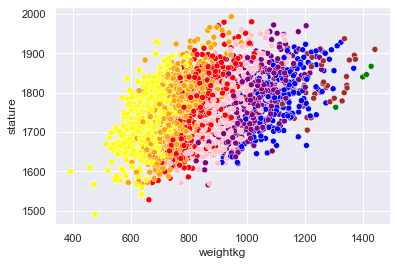

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.scatterplot(y=new_male['stature'], x=new_male['weightkg'], c=new_male['tshirt_color'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

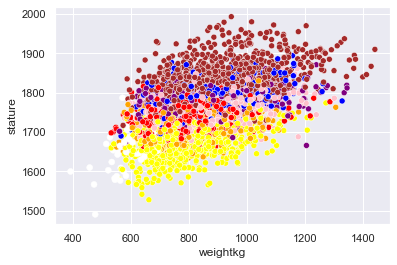

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.scatterplot(y=new_male['stature'], x=new_male['weightkg'], c=new_male['pants_color'])

plt.show

<AxesSubplot:xlabel='weightkg', ylabel='stature'>

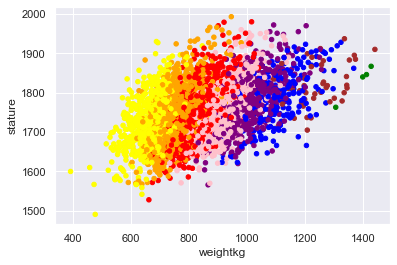

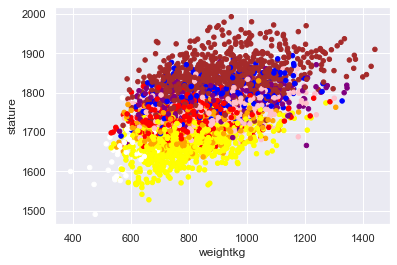

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

new_male.plot(kind='scatter', x='weightkg', y='stature', c='tshirt_color')
new_male.plot(kind='scatter', x='weightkg', y='stature', c='pants_color')

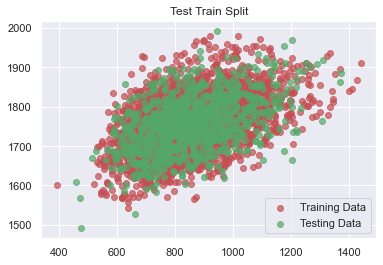

In [24]:
x_train, x_test, y_train, y_test = train_test_split(new_male.weightkg, new_male.stature)

plt.scatter(x_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [25]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

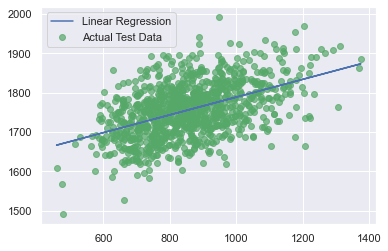

In [26]:
prediction = LR.predict(x_test.values.reshape(-1,1))

plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [27]:
LR.predict(np.array([[1000]]))[0]

1788.9310605817604

In [28]:
#LR.score(x_test,y_test)

In [29]:
# x = np.array(list(zip(new_male['stature'], new_male['weightkg'])))
# y = np.array(new_male['tshirt_size'])
# x_train, x_test, y_train, y_test = train_test_split(x, y)
# LR = LinearRegression()
# LR.fit(x.reshape(-1,1), y)
# LR.predict(np.array([[800]]))[0]

In [30]:
x = np.array(list(zip(new_male['stature'], new_male['weightkg'])))
y = np.array(new_male['tshirt_size'])
x.reshape(1, -1)

array([[1776,  815, 1702, ...,  731, 1828,  985]])

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x, y)

predicted=knn.predict([[my_length,my_weight]])
print(predicted)

['Medium']


In [32]:
K = new_male.sort_values(by=['closest']).head(10)
K['tshirt_size'].value_counts().idxmax()

'Medium'